In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import select_features
#archivo = '..\data\ISBSG - Release May 2017 R1.csv'
archivo = '..\data\ISBSG DATA Release 12.csv'
df = pd.read_csv(archivo, sep = ';', low_memory = False)
#variables = ['Data Quality Rating', 'UFP rating', 'Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Count Approach', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Summary Work Effort', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Resource Level', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count', 'Agile Method Used']
variables = ['Data Quality Rating', 'UFP rating', 'Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Count Approach', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Summary Work Effort', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Resource Level', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count']
df = df.loc[:, variables]
filtro = ((df['Data Quality Rating'] == 'A') | (df['Data Quality Rating'] == 'B')) & ((df['UFP rating'] == 'A') | (df['UFP rating'] == 'B')) 
df = df.loc[filtro, :]
filtro = (df['Normalised Work Effort Level 1'].notnull()) & (df['Normalised Work Effort Level 1'] == df['Summary Work Effort'])
df = df.loc[filtro, :]
filtro = df['Count Approach'] == 'IFPUG 4+'
df = df.loc[filtro, :]
#variables = ['Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count', 'Agile Method Used']
variables = ['Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count']
df = df.loc[:, variables]
df = df.dropna(axis=1, thresh=int(0.5*len(df)))
df = df.dropna()
print(len(df))
df['Project Elapsed Time'] = df['Project Elapsed Time'].str.replace(',', '.').astype(float)
programmingLenguaje = {'A:G':'Unspecified', 'ASP.Net':'ASP', 'BASIC':'Visual Basic', 'CSP':'Unspecified', 'Visual C':'C'}
df['Primary Programming Language'].replace( programmingLenguaje, inplace = True)
database = {'[;].*':';','ACCESS[; ].*':'ACCESS', 'MS Access':'ACCESS', 'ACCESS;':'ACCESS', 'ADABAS;':'ADABAS', 'Micosoft.*':'Attain', 'DB2[; /].*':'DB2', 'IBM DB2':'DB2', 'UDB2':'DB2', 'Domino[ ].*':'Domino', 'LOTUS.*':'Domino', 'Notes.*':'Domino', 'Exchange.*':'Exchange', 'FOXPRO;':'Foxpro', 'HIRDB;':'HIRDB', 'DB[/].*':'IMS', 'DEDB;':'IMS', 'IDMS[; -].*':'IMS', 'IMS.*':'IMS', 'MS[- ]SQL[; ].*':'MS SQL', 'MSDE.*':'MS SQL', 'SQL Server[; ].*':'MS SQL', 'SQL;':'MS SQL', 'VSE/.*':'MS SQL', 'NCR;':'NCR', 'Oracle.*':'ORACLE', 'Personal O.*':'ORACLE', 'RDB[; ].*':'ORACLE', 'CICS;':'ORACLE', 'SAS;':'SAS', 'Solid;':'Solid', 'SYBASE.*':'SYBASE', 'YES':'Unspecified', 'ISAM;':'Unspecified', 'multiple;':'Unspecified', 'VSAM[; ].*':'Unspecified', 'WATCOM[; ].*':'Watcom', 'WGRES;':'WGRES'}
df['1st Data Base System'].replace( database, inplace = True, regex = True)
df['1st Data Base System'].replace( {'ACCESS;':'ACCESS'}, inplace = True, regex = True)

Using TensorFlow backend.
621


In [2]:
#Pruebas KNN con dataframes pequeños
df = select_features.recode_dataframe(df)
df_knn_small = df.iloc[0:20]
mmrev1, res1 = select_features.calcular_mmre('Normalised Work Effort Level 1',df_knn_small)
mmrev2, res2 = select_features.calcular_mmre_v2('Normalised Work Effort Level 1', df_knn_small)
print('MMRE',mmrev1)
print('MMREv2',mmrev2)

Imputing row 1/20 with 1 missing, elapsed time: 0.000
Imputing row 1/20 with 0 missing, elapsed time: 0.000
Imputing row 1/20 with 0 missing, elapsed time: 0.000
Imputing row 1/20 with 0 missing, elapsed time: 0.000
Imputing row 1/20 with 0 missing, elapsed time: 0.000
Imputing row 1/20 with 0 missing, elapsed time: 0.001
Imputing row 1/20 with 0 missing, elapsed time: 0.001
Imputing row 1/20 with 0 missing, elapsed time: 0.001
Imputing row 1/20 with 0 missing, elapsed time: 0.001
Imputing row 1/20 with 0 missing, elapsed time: 0.001
Imputing row 1/20 with 0 missing, elapsed time: 0.000
Imputing row 1/20 with 0 missing, elapsed time: 0.000
Imputing row 1/20 with 0 missing, elapsed time: 0.001
Imputing row 1/20 with 0 missing, elapsed time: 0.000
Imputing row 1/20 with 0 missing, elapsed time: 0.001
Imputing row 1/20 with 0 missing, elapsed time: 0.001
Imputing row 1/20 with 0 missing, elapsed time: 0.001
Imputing row 1/20 with 0 missing, elapsed time: 0.001
Imputing row 1/20 with 0 mis

MMRE using 1 neighbors 1.96208173671986
MMREv2 using 1 neighbors 1.96208173671986
MMRE using 2 neighbors 1.7525037883624113
MMREv2 using 2 neighbors 1.7943685957936426
MMRE using 3 neighbors 1.7340468891504088
MMREv2 using 3 neighbors 1.7542617918780492
MMRE using 4 neighbors 1.6832022726559064
MMREv2 using 4 neighbors 1.7208187452082604
MMRE using 5 neighbors 1.6485429768778834
MMREv2 using 5 neighbors 1.695678842163315
MMRE using 6 neighbors 1.618380101123939
MMREv2 using 6 neighbors 1.6776809608417247
MMRE using 7 neighbors 1.631259982389037
MMREv2 using 7 neighbors 1.6881803196412657
MMRE using 8 neighbors 1.6269783127805488
MMREv2 using 8 neighbors 1.6820830789620858
MMRE using 9 neighbors 1.6063498934956693
MMREv2 using 9 neighbors 1.666374878217826
MMRE using 10 neighbors 1.6124967437713158
MMREv2 using 10 neighbors 1.6714178338798766


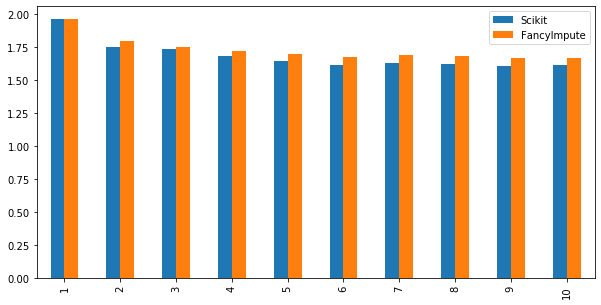

In [2]:
df = select_features.recode_dataframe(df)
pruebak = pd.DataFrame(columns=['Scikit', 'FancyImpute'])
for i in range(1,11):
    mmrev1 = select_features.calcular_mmre('Normalised Work Effort Level 1', df, i)
    mmrev2 = select_features.calcular_mmre_v2('Normalised Work Effort Level 1', df, i)
    print('MMRE using', i, 'neighbors', mmrev1)
    print('MMREv2 using', i, 'neighbors', mmrev2)
    pruebak = pruebak.append({'Scikit':mmrev1, 'FancyImpute':mmrev2}, ignore_index=True)
pruebak.index += 1
pruebak.plot.bar(figsize=(10, 5))

In [ ]:
mmre = select_features.calcular_mmre('Normalised Work Effort Level 1', select_features.recode_dataframe(df))
mmre

In [ ]:
mmre = select_features.calcular_mmre_v2('Normalised Work Effort Level 1', select_features.recode_dataframe(df))
mmre

In [ ]:
df = select_features.recode_dataframe_R(df)
mi1 = select_features.calcular_mi_R_2v('Project_Elapsed_Time', 'Functional_Size', df)
mi2 = select_features.calcular_mi_R_2v('Functional_Size', 'Project_Elapsed_Time' ,df)
print(mi1)
print(mi2)

In [ ]:
#df = select_features.recode_dataframe_R(df)
mi = select_features.calcular_mi_R('Normalised_Work_Effort_Level_1', select_features.recode_dataframe_R(df))
print(mi)
mi.plot.bar(figsize=(10, 5))

In [ ]:
df = select_features.recode_dataframe_R(df)
mrmr = select_features.calcular_mrmr_R('Normalised_Work_Effort_Level_1', df)
print(mrmr)
mrmr.plot.bar(figsize=(10, 6))

In [2]:
testing = select_features.calc_mi_scikit(df['1st Data Base System'], df['Adjusted Function Points'])
print(testing)
testing = select_features.calc_mi_scikit(df['Adjusted Function Points'], df['1st Data Base System'])
print(testing)

0.40131623846374836
0.40131623846374836


In [ ]:
mRMR = select_features.calcular_mRMRV2('Normalised Work Effort Level 1', df)
#mRMR.sort_values(ascending=False).plot.bar(figsize=(10, 5))
mRMR.plot.bar(figsize=(10, 5))
mRMR

In [ ]:
#Utilizando el método normalize_mutual_info_score
mi = select_features.calcularMi_Manual('Normalised Work Effort Level 1', df)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
print(mi)

In [ ]:
df.dtypes

In [ ]:
#variables = ['Industry Sector', 'Application Group', 'Development Type', 'Platform Development', 'Language Type', 'Primary Programming Language', '1st Data Base System', 'Used Methodology']
variables = ['1st Data Base System']
dcount = df.loc[:, variables]
for c in dcount.columns:
    print("---- %s ---" % c)
    print(dcount[c].value_counts())
    print('')